In [ ]:




from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Transformed_Housing_Data2.csv to Transformed_Housing_Data2.csv
User uploaded file "Transformed_Housing_Data2.csv" with length 2413737 bytes


In [ ]:
import pandas as  pd

data=pd.read_csv("Transformed_Housing_Data2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.describe()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,0.234347,7.623490,1788.319589,291.513490,46.999722,47.560050,-122.213875,1986.553242,12769.770790,0.884122,0.078717,0.649174,0.262761,0.007960,0.042297,0.007543,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,2.500620e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,0.766382,1.105519,827.977604,442.570991,29.373317,0.138556,0.140832,685.427485,27306.508841,5.279629,0.269303,0.477240,0.440144,0.088863,0.201271,0.086525,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,3.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,21.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,43.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,67.000000,47.678000,-122.125000,2360.000000,10084.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,9410.000000,4820.000000,118.000000,47.777600,-121.315000,6210.000000,871200.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

**SCALING the data set**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler=StandardScaler()
Y=data['Sale_Price']
X= scaler.fit_transform(data.drop(columns =['Sale_Price']))

X=pd.DataFrame(data=X,columns=data.drop(columns =['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,0.735132,-0.597003,-0.089574,4.758385,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-1.360300,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


**CHECKING AND REMOVING MULTICOLLINEARTY**

In [ ]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198,0.028148,0.004778,-0.008847,-0.051957,0.018573,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551,-0.034281,0.190440,-0.166037,-0.077419,0.050282,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503,-0.018182,0.102627,-0.083995,-0.065334,0.055111,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835,-0.014503,-0.011334,0.013033,0.037619,0.007736,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901,-0.120524,0.317934,-0.257680,-0.055951,0.006297,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.093546,0.034392,-0.037127,0.022690,-0.018557,0.104051,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388,-0.082628,0.197510,-0.140113,-0.090561,0.010010,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491,-0.088424,0.194517,-0.142458,-0.058931,0.023202,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158,0.127876,-0.151347,0.092539,-0.025312,0.070969,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,0.148083,-0.409515,-0.326307,-0.071016,0.203375,0.244330,-0.391693,0.257392,0.067269,0.225182,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [ ]:
X.shape

(21609, 30)

In [ ]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(  k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [ ]:
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
VIF = pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index =vif_data.columns)
VIF

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [ ]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [ ]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def MC_remover(data):
  vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
  if vif.max()>5:
    print(vif[vif==vif.max()].index[0],'has been removed')
    data=data.drop(columns=vif[vif==vif.max()].index[0])
    return data
  else:
    print("no multicolinerty")
    return data  


In [ ]:
for i in range(7):
  vif_data=MC_remover(vif_data)
  vif_data.head()

no multicolinerty
no multicolinerty
no multicolinerty
no multicolinerty
no multicolinerty
no multicolinerty
no multicolinerty


In [ ]:
x =vif_data
y=data['Sale_Price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [ ]:
predictions = lr.predict(x_test)
lr.score(x_test,y_test)

0.8461987715586199

In [ ]:
residuals = predictions - y_test
residual_table =pd.DataFrame({'residuals':residuals,
                              'predictions':predictions})
residual_table = residual_table.sort_values(by ='predictions')


In [ ]:
residual_table

,residuals,predictions
1147,-226899.922361,-1.518999e+05
19450,-210795.272576,-6.879527e+04
4201,-140057.717848,9.942282e+03
11586,-156956.559744,3.104344e+04
13714,-145500.198922,3.449980e+04
...,...,...
6506,369963.447042,1.499538e+06
9252,398475.423771,1.528050e+06
15253,441105.516766,1.570681e+06
18475,444424.624355,1.574000e+06


In [ ]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

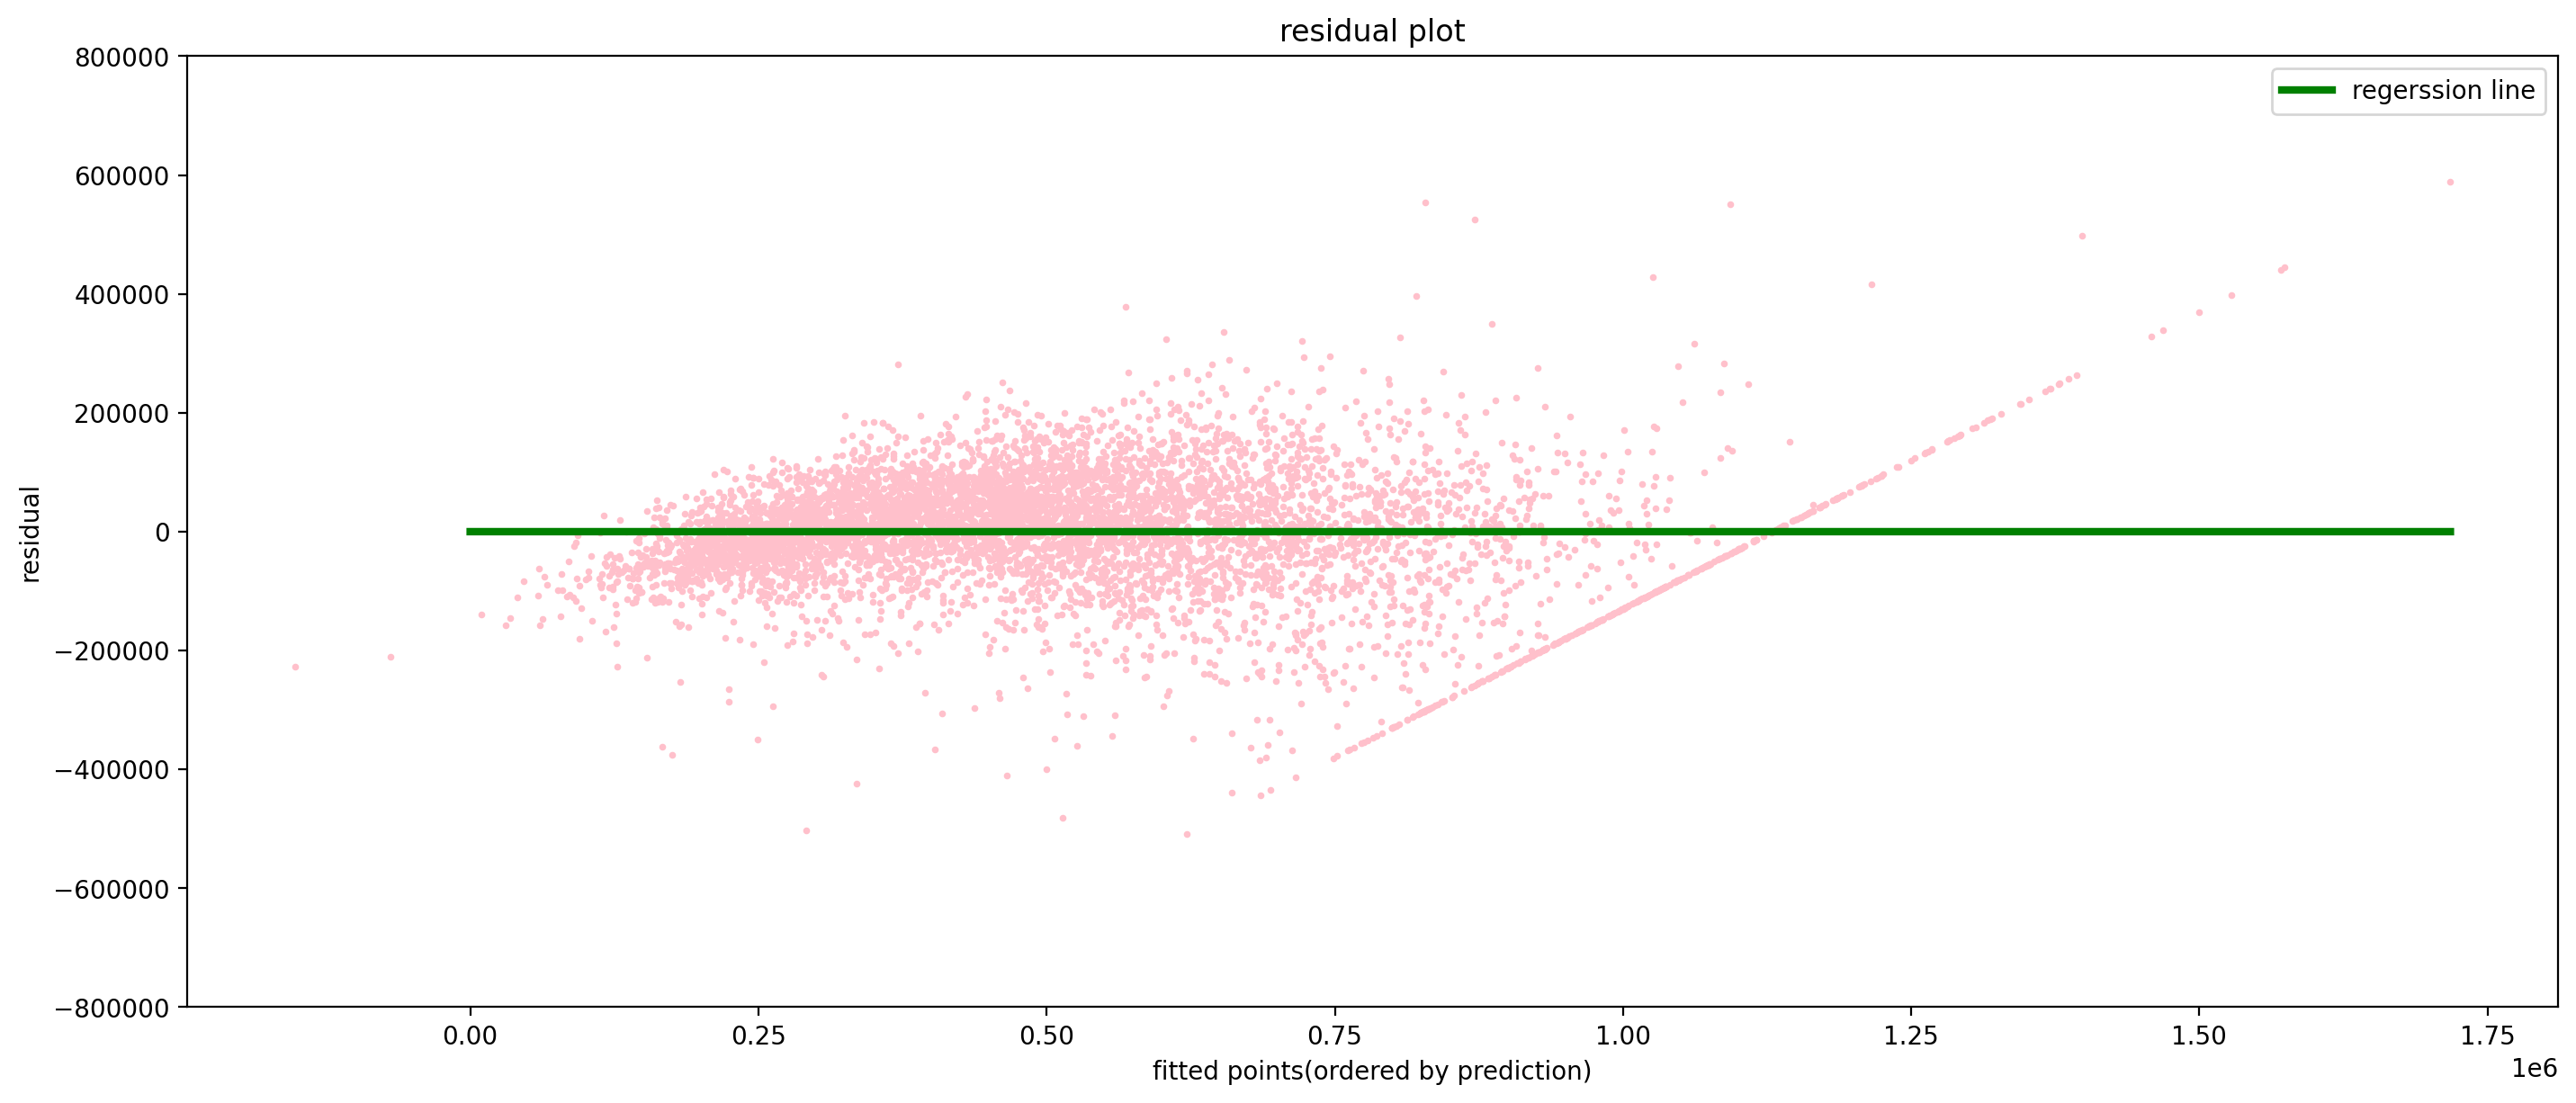

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi = 200,figsize=(17,7))
plt.scatter(residual_table['predictions'],residual_table['residuals'],color ='pink',s=3)
plt.plot(z,k,color='green',linewidth=3,label='regerssion line')
plt.ylim(-800000,800000)
plt.xlabel("fitted points(ordered by prediction)")
plt.ylabel("residual")
plt.title("residual plot")
plt.legend()
plt.show()

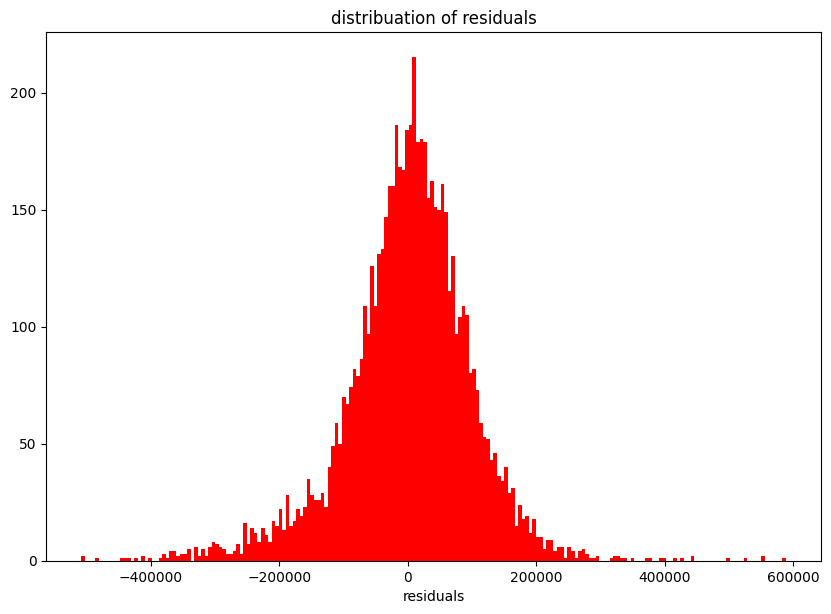

In [ ]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residual_table['residuals'],color ='red',bins=200)
plt.xlabel("residuals")
plt.title("distribuation of residuals")
plt.show()